In [1]:
#importing all the modules

import seaborn as sns
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
!pip install ekphrasis
!pip install tweet-preprocessor
import preprocessor as p



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 668.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
dataset = pd.read_csv('/content/CHATGPT1.csv') #loading the dataset

In [3]:
dataset.head() #shows the first five rows of the dataset

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1.0,0.0,5.0,0.0,1.617156e+18,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0.0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1.0,0.0,5.0,0.0,1.617149e+18,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0.0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0.0,0.0,4.0,0.0,1.617156e+18,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1.0
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0.0,0.0,2.0,0.0,1.617156e+18,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0.0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0.0,0.0,4.0,0.0,1.617156e+18,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0.0


# **Preprocessing the dataset wherever there are NaN and [ ] empty lists, and applying functions for preprocessing**

In [4]:

# Fill missing values with a specific value, such as "Unknown"
dataset = dataset.fillna("Unknown")

# Replace empty lists with None
dataset['hashtag'] = dataset['hashtag'].apply(lambda x: None if x == '[]' else x)


dataset.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,Unknown,Unknown,1.0,0.0,5.0,0.0,1617156270871699456.0,ja,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,Unknown,None,0.0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,Unknown,Unknown,1.0,0.0,5.0,0.0,1617148639993806848.0,en,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,"[User(username='AlexandrovnaIng', id=282705900...",None,0.0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0.0,0.0,4.0,0.0,1617156308926349312.0,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1.0
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0.0,0.0,2.0,0.0,1617156332297256960.0,en,"<a href=""http://twitter.com/download/android"" ...",Unknown,https://twitter.com/agadmator/status/161715501...,Unknown,None,0.0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,Unknown,Unknown,0.0,0.0,4.0,0.0,1617156345064570880.0,tr,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,Unknown,None,0.0


In [5]:
dataset.duplicated() #to see if there are any duplicate for the series values

0       False
1       False
2       False
3       False
4       False
        ...  
2844    False
2845    False
2846    False
2847    False
2848    False
Length: 2849, dtype: bool

In [6]:
dataset.duplicated().sum() #to prove that there really is no duplicate

0

In [7]:
dataset.isnull()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2846,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2847,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
dataset.isnull().sum() #checks if there are any null values for any column and then sums all the series values

Datetime             0
Tweet Id             0
Text                 0
Username             0
Permalink            0
User                 0
Outlinks             0
CountLinks           0
ReplyCount           0
RetweetCount         0
LikeCount            0
QuoteCount           0
ConversationId       0
Language             0
Source               0
Media                0
QuotedTweet          0
MentionedUsers       0
hashtag           2076
hastag_counts        0
dtype: int64

## **Below are the counts for Usernames, likes, replies, retweets and hashtags**

In [9]:
dataset.Username.value_counts()

zaganos_pacha     8
LluisMontoliu     8
k_looked          7
reopa_sharkun     6
N3tyan_           6
                 ..
tom2rd            1
CrazyDutchGuy1    1
convl0            1
Keyurshah3535     1
Unknown           1
Name: Username, Length: 2557, dtype: int64

In [10]:
dataset.RetweetCount.value_counts()

0.0        2408
1.0         234
2.0          70
3.0          28
4.0          18
5.0          11
6.0           9
7.0           7
10.0          6
12.0          6
8.0           5
15.0          3
19.0          3
18.0          3
49.0          2
34.0          2
20.0          2
31.0          2
27.0          2
11.0          2
16.0          2
26.0          2
38.0          1
17.0          1
14.0          1
125.0         1
74.0          1
461.0         1
68.0          1
13.0          1
9.0           1
23.0          1
160.0         1
37.0          1
45.0          1
58.0          1
6815.0        1
1094.0        1
36.0          1
39.0          1
112.0         1
40.0          1
542.0         1
Unknown       1
Name: RetweetCount, dtype: int64

In [11]:
dataset.LikeCount.value_counts()

0.0        1464
1.0         537
2.0         259
3.0         132
4.0          80
           ... 
31.0          1
131.0         1
251.0         1
86.0          1
Unknown       1
Name: LikeCount, Length: 100, dtype: int64

In [12]:
dataset.hashtag.value_counts()

['#ChatGPT']                                                             171
['#chatGPT']                                                              32
['#chatgpt']                                                              16
['#ArtificialIntelligence']                                                9
['#ChatGPT', '#AI']                                                        7
                                                                        ... 
['#06']                                                                    1
['#AI', '#TechnologyNews', '#Artificial_Intelligence']                     1
['#chatgpt,']                                                              1
['#ChatGPT', '#chatgpt3', '#wordpress', '#ai', '#free', '#freestuff']      1
Unknown                                                                    1
Name: hashtag, Length: 494, dtype: int64

In [13]:
dataset.ReplyCount.value_counts()

0.0        2011
1.0         598
2.0         107
3.0          44
5.0          14
4.0          13
7.0          11
8.0           6
9.0           5
6.0           5
10.0          5
15.0          2
17.0          2
23.0          2
11.0          2
13.0          2
43.0          1
20.0          1
111.0         1
29.0          1
164.0         1
286.0         1
28.0          1
12.0          1
69.0          1
1421.0        1
3098.0        1
21.0          1
34.0          1
54.0          1
22.0          1
126.0         1
149.0         1
209.0         1
37.0          1
Unknown       1
Name: ReplyCount, dtype: int64

# **QUESTION 1 PART 1: SENTIMENTAL ANALYSIS**

In [14]:
#importing all the important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Preprocessing the Texts so that Sentimental Analysis can be applied**

In [15]:
def preprocessing_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", "", text)

        # Remove usernames starting with @
        text = re.sub(r"@[^\s]+", "", text)

        # Remove non-alphanumeric characters and convert to lowercase
        text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words("english"))
        filtered_tokens = [token for token in tokens if token not in stop_words]

        # Join the tokens back into a single string
        processed_text = " ".join(filtered_tokens)

        return processed_text
    else:
        return ""  # Return an empty string for non-string inputs



In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
# Apply preprocessing to the "Text" column
dataset["ProcessedText"] = dataset["Text"].apply(preprocessing_text)

In [18]:

# Print the preprocessed data
print(dataset["ProcessedText"])

0                                                 chatgpt
1       prohibition chatgpt added honor code daughter ...
2       schaut euch alles auf die piste bringt um euch...
3                                             bow chatgpt
4       profilinde vatan rkiye falan yazan bireylerin ...
                              ...                        
2844    fun watch chatgpt get simple history questions...
2845    je nachdem wie h ufig ich davon abgehalten wer...
2846                       chatgpt chatgpt capacity right
2847                                         chatgpt html
2848    openai est trabalhando em um ritmo mais lento ...
Name: ProcessedText, Length: 2849, dtype: object


# **Code for Sentimental Analysis**

In [19]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
sentiment_analysis = SentimentIntensityAnalyzer()

#the conditions for Labelling the preprocessed texts
#Positive: 1, Neutral: 0, Negative: -1
def sentiment_type(tweet):
    try:
        if sentiment_analysis.polarity_scores(tweet)['compound'] > 0:
            return "Positive"
        elif sentiment_analysis.polarity_scores(tweet)['compound'] < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"

In [21]:
#Adding the new sentimented texts into the dataset with their labels
dataset['Sentimented_Texts'] = dataset['Text'].apply(lambda x: sentiment_type(x))

In [22]:
dataset['Sentimented_Texts'].value_counts()

Neutral     1512
Positive     894
Negative     443
Name: Sentimented_Texts, dtype: int64

In [23]:
dataset.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,ProcessedText,Sentimented_Texts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,Unknown,Unknown,1.0,0.0,...,1617156270871699456.0,ja,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,Unknown,None,0.0,chatgpt,Neutral
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,Unknown,Unknown,1.0,0.0,...,1617148639993806848.0,en,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,"[User(username='AlexandrovnaIng', id=282705900...",None,0.0,prohibition chatgpt added honor code daughter ...,Positive
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0.0,0.0,...,1617156308926349312.0,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1.0,schaut euch alles auf die piste bringt um euch...,Negative
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0.0,0.0,...,1617156332297256960.0,en,"<a href=""http://twitter.com/download/android"" ...",Unknown,https://twitter.com/agadmator/status/161715501...,Unknown,None,0.0,bow chatgpt,Neutral
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,Unknown,Unknown,0.0,0.0,...,1617156345064570880.0,tr,"<a href=""http://twitter.com/download/iphone"" r...",Unknown,Unknown,Unknown,None,0.0,profilinde vatan rkiye falan yazan bireylerin ...,Neutral


# **QUESTION 1 PART 2: USER CLASSIFICATION**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [37]:


# Convert 'ProcessedText' and 'Username' columns to numerical representation
text_encoder = LabelEncoder()
dataset['ProcessedText'] = text_encoder.fit_transform(dataset['ProcessedText'])

username_encoder = LabelEncoder()
dataset['Username'] = username_encoder.fit_transform(dataset['Username'])

In [38]:
# Set the features and target variables
X = dataset['ProcessedText']  # Feature: preprocessed texts
y = dataset['Username']  # Target variable: usernames

In [44]:
#the training set is 80% and the test set is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
k = 5  # Number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)


In [46]:
knn.fit(X_train.values.reshape(-1, 1), y_train)  # Reshape X_train to match the expected input shape



KNeighborsClassifier()

In [47]:
# Make predictions on the test set
y_pred = knn.predict(X_test.values.reshape(-1, 1))  # Reshape X_test to match the expected input shape



In [48]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.007017543859649123


# **QUESTION 1 PART 3: CLUSTERING**

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [99]:
dataset = dataset[['Tweet IDs', 'ProcessedText']]

KeyError: ignored

In [55]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['ProcessedText'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


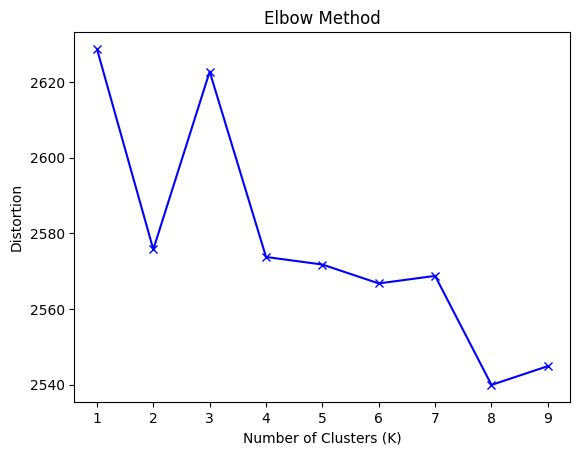

In [56]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [63]:
k = 5  # Choose the optimal value of K based on the elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [64]:
dataset['Cluster'] = kmeans.labels_

In [85]:
y_kmeans = kmeans.predict(X)

# Convert X to a dense array for indexing in the scatter plot
X_dense = X.toarray()

# Visualize the clusters
plt.scatter(X_dense[y_kmeans==0, 0], X_dense[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_dense[y_kmeans==1, 0], X_dense[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_dense[y_kmeans==2, 0], X_dense[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_dense[y_kmeans==3, 0], X_dense[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X_dense[y_kmeans==4, 0], X_dense[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Processed Tweets')
plt.ylabel('Hashtags')
plt.legend()
plt.show()

ValueError: ignored

# **QUESTION 1 PART 4: ENGAGEMENT ANALYSIS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/CHATGPT1.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select the relevant columns for prediction
data = df[['Text', 'ReplyCount', 'RetweetCount']]

# Split the data into training and testing sets
X = data['Text']
y_reply = data['ReplyCount']
y_retweet = data['RetweetCount']
X_train, X_test, y_reply_train, y_reply_test, y_retweet_train, y_retweet_test = train_test_split(
    X, y_reply, y_retweet, test_size=0.2, random_state=42)

# Vectorize the sentimented texts
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Random Forest model for ReplyCount
rf_reply = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reply.fit(X_train, y_reply_train)

# Train the Random Forest model for RetweetCount
rf_retweet = RandomForestRegressor(n_estimators=100, random_state=42)
rf_retweet.fit(X_train, y_retweet_train)

# Make predictions on the test set
reply_predictions = rf_reply.predict(X_test)
retweet_predictions = rf_retweet.predict(X_test)

# Calculate root mean squared error (RMSE)
reply_rmse = mean_squared_error(y_reply_test, reply_predictions, squared=False)
retweet_rmse = mean_squared_error(y_retweet_test, retweet_predictions, squared=False)

# Print the predictions
for i, sentiment_text in enumerate(X_test):
    print(f"Text: {X_test[i]}")
    print(f"Predicted ReplyCount: {reply_predictions[i]}")
    print(f"Predicted RetweetCount: {retweet_predictions[i]}")
    print()

# Print RMSE
print(f"ReplyCount RMSE: {reply_rmse}")
print(f"RetweetCount RMSE: {retweet_rmse}")